In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../results/sampling_no_searching_kdn'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [4]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score', 'test score global', 'performance gap', 'complexity class difference'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        summary.loc[i, 'threshold'] = exp_summary[model]['threshold']
        summary.loc[i, 'sample'] = exp_summary[model]['sample_proportion']
        summary.loc[i, 'test score'] = exp_summary[model]['test_score']
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['test score']

In [5]:
# diferencia de complejidad < 0.15, incluyo el triple de ceros (casi todo ceros y me los estoy comiendo)
summary[(summary['complexity class difference'] < 15e-2) & (summary['performance gap'] > 9e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
18,banknote,RandomForestClassifier,0.11,0.95,0.96349,0.996333,0.032843,0.006315
19,banknote,GradientBoostingClassifier,0.1,0.8,0.981747,0.996333,0.014586,0.006315
23,breastcancer,GradientBoostingClassifier,1.0,0.95,0.96291,0.972077,0.009167,0.074077
24,bupa,SVC,0.95,0.85,0.569923,0.616436,0.046513,0.013083
25,bupa,KNeighborsClassifier,0.67,0.55,0.569923,0.59544,0.025517,0.013083
26,bupa,RandomForestClassifier,0.22,0.3,0.582563,0.594118,0.011555,0.013083
28,cleve,SVC,0.94,0.8,0.785112,0.802488,0.017376,0.07597
30,cleve,RandomForestClassifier,0.4,0.15,0.804923,0.82048,0.015557,0.07597
31,cleve,GradientBoostingClassifier,0.94,0.8,0.802488,0.852004,0.049516,0.07597
50,fourclass,RandomForestClassifier,0.28,0.75,0.981117,1.0,0.018883,0.010549


In [6]:
# diferencia de complejidad > 0.25, incluyo la clase más compleja completa
summary[(summary['complexity class difference'] > 10e-2) & (summary['performance gap'] > 9e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
46,flare,RandomForestClassifier,0.86,0.3,0.63746,0.655041,0.017581,0.568154
52,german_numer,SVC,0.68,0.2,0.702104,0.715562,0.013458,0.37219
54,german_numer,RandomForestClassifier,0.78,0.3,0.715796,0.737439,0.021643,0.37219
74,ionosphere,RandomForestClassifier,0.82,0.9,0.940178,0.954327,0.014149,0.529861
75,ionosphere,GradientBoostingClassifier,0.75,0.7,0.954327,0.96913,0.014803,0.529861
82,liver-disorders,RandomForestClassifier,0.97,0.9,0.698638,0.739742,0.041104,0.245505
96,sonar,SVC,0.83,0.45,0.791374,0.883873,0.092498,0.144893
100,splice,SVC,0.98,0.45,0.865134,0.884967,0.019832,0.320708
103,splice,GradientBoostingClassifier,0.98,0.45,0.969973,0.979982,0.010009,0.320708
117,w1a,KNeighborsClassifier,0.99,0.2,0.674194,0.696478,0.022284,0.531669


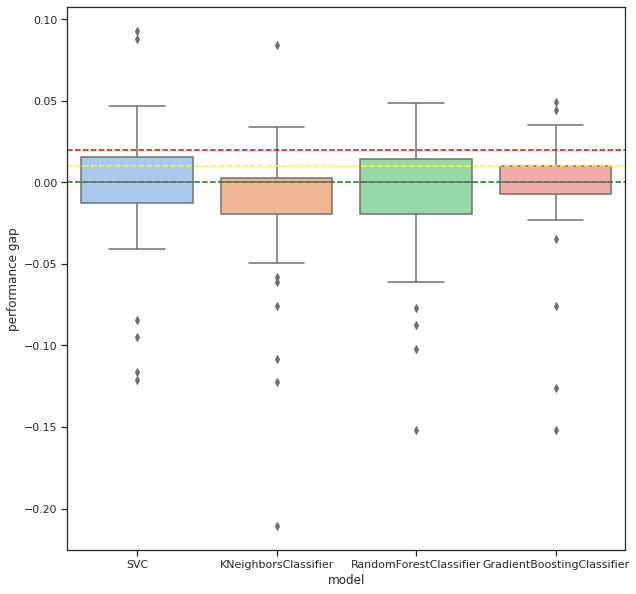

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

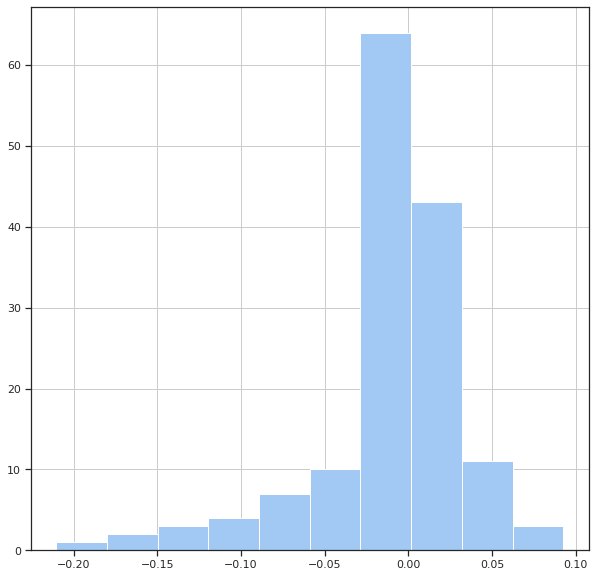

In [8]:
summary['performance gap'].hist(bins=10);

In [9]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)])

count    148.000000
mean      -0.009565
std        0.043889
min       -0.210442
10%       -0.065547
20%       -0.020555
30%       -0.010383
40%       -0.000704
50%        0.000000
60%        0.000879
70%        0.007086
80%        0.014716
90%        0.023254
max        0.092498
Name: performance gap, dtype: float64

In [10]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]), '\n')

SVC
count    37.000000
mean     -0.003401
std       0.044523
min      -0.121325
0%       -0.121325
10%      -0.058310
20%      -0.017581
30%      -0.006241
40%       0.000000
50%       0.000000
60%       0.003077
70%       0.013376
80%       0.017278
90%       0.040149
max       0.092498
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean     -0.015586
std       0.049938
min      -0.210442
0%       -0.210442
10%      -0.066981
20%      -0.029362
30%      -0.011648
40%      -0.001961
50%       0.000000
60%       0.000000
70%       0.000947
80%       0.007182
90%       0.019300
max       0.083916
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean     -0.013057
std       0.042023
min      -0.151957
0%       -0.151957
10%      -0.067405
20%      -0.046866
30%      -0.017463
40%      -0.009029
50%       0.000000
60%       0.003153
70%       0.011461
80%       0.016363
90%       0.020539
max       0.048605
Name: performance

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['sample'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.783243
std       0.251607
min       0.010000
25%       0.700000
50%       0.910000
75%       0.970000
max       1.000000
Name: sample, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.770270
std       0.247133
min       0.010000
25%       0.680000
50%       0.850000
75%       0.940000
max       0.990000
Name: sample, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.753243
std       0.268608
min       0.010000
25%       0.700000
50%       0.820000
75%       0.970000
max       1.000000
Name: sample, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.801622
std       0.245578
min       0.010000
25%       0.750000
50%       0.890000
75%       0.970000
max       1.000000
Name: sample, dtype: float64 



In [12]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['threshold'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.602703
std       0.272831
min       0.100000
25%       0.400000
50%       0.750000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.524324
std       0.260774
min       0.150000
25%       0.250000
50%       0.600000
75%       0.750000
max       0.950000
Name: threshold, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.602703
std       0.283565
min       0.150000
25%       0.300000
50%       0.750000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.639189
std       0.252525
min       0.100000
25%       0.450000
50%       0.700000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 



In [13]:
import scipy.stats as st

In [14]:
st.spearmanr(summary['test score'], summary['test score global'])[0]

0.9599474518028829